<center>
    <h1> INF477 - Redes Neuronales Artificiales  </h1>
    <h2> Tarea #2 - Parte III: Redes Convolucionales en Google Street View </h2> 
</center>

Tarea realizada por:
* Alvaro Salinas - `alvaro.salinase@gmail.com` - **rol:** 201073001-8
* Martín Villanueva - `martin.villanueva@alumnos.usm.cl` - **rol:** 201104012-0

_DI UTFSM. Septiembre 2016._

## Tabla de Contenidos
* [Redes Convolucionales en Google Street View](#conv)
    * [Parte (a)](#a)
    * [Parte (b)](#b)
    * [Parte (c)](#c)
    * [Parte (d)](#d)
    * [Parte (e)](#e)
    * [Parte (f)](#f)
    * [Parte (g)](#g)
    * [Parte (h)](#h)
    * [Parte (i)](#i)
    * [Parte (j)](#j)

<div id='conv'/>
## Redes Convolucionales en Google Street View


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.io as sio
import numpy as np
import random

In [16]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import SGD, Adadelta, Adagrad

<div id='a'/>
### Parte (a)

In [3]:
train_data = sio.loadmat('train_32x32.mat')
test_data = sio.loadmat('test_32x32.mat')
X_train = train_data['X'].T
y_train = train_data['y'] - 1
X_test = test_data['X'].T
y_test = test_data['y'] - 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
n_classes = len(np.unique(y_train))

In [4]:
print "Tamano de las imagenes:", X_train.shape[2],'x',X_train.shape[3]
print "Numero de clases:", n_classes
print "Numero de ejemplos por categoria:"
print "{0:15}".format("Categoria", 'centered'),
for i in np.unique(y_train):
    print "{0:^6}".format(str(i), 'centered'),
print "{0:^8}".format("Total", 'centered')
print "{0:15}".format("Entrenamiento", 'centered'),
for i in np.unique(y_train):
    print "{0:^6}".format(str(np.where(y_train==i)[0].shape[0]), 'centered'),
print "{0:^8}".format(str(y_train.shape[0]), 'centered')
print "{0:15}".format("Prueba", 'centered'),
for i in np.unique(y_train):
    print "{0:^6}".format(str(np.where(y_test==i)[0].shape[0]), 'centered'),
print "{0:^8}".format(str(y_test.shape[0]), 'centered')

Tamano de las imagenes: 32 x 32
Numero de clases: 10
Numero de ejemplos por categoria:
Categoria         0      1      2      3      4      5      6      7      8      9     Total  
Entrenamiento   13861  10585   8497   7458   6882   5727   5595   5045   4659   4948   73257  
Prueba           5099   4149   2882   2523   2384   1977   2019   1660   1595   1744   26032  


In [5]:
def resize_img(im):
    a = np.zeros((32,32,3))
    for rgb in range(len(im)):
        for i in range(len(im[rgb])):
            for j in range(len(im[rgb][i])):
                a[j][i][rgb] = im[rgb][i][j]
    return a

Visualizacion de imagenes aleatorias:


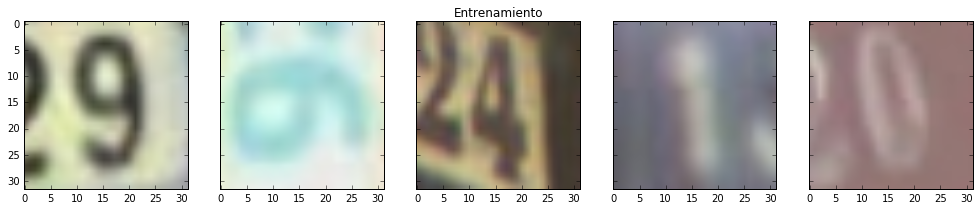

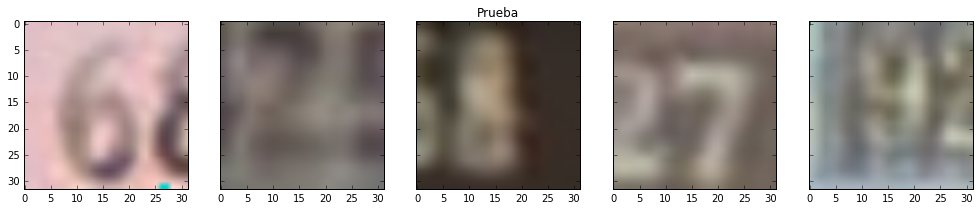

In [6]:
print "Visualizacion de imagenes aleatorias:"
f, ax = plt.subplots(1, 5, sharey=True, figsize=(17,3))
ax[2].set_title("Entrenamiento")
for i in range(5):
    ax[i].imshow(resize_img(random.choice(X_train)))
f, ax = plt.subplots(1, 5, sharey=True, figsize=(17,3))
ax[2].set_title("Prueba")
for i in range(5):
    ax[i].imshow(resize_img(random.choice(X_test)))

Como comentario, podemos decir que las imágenes vienen en un formato no adecuado para su visualización, por lo que fue necesario crear la funcion resize_img() para darles las dimensiones correctas. Por otro lado, se ve que las imágenes son bastante "borrosas", incluso no puediendo el ojo humano decifrar el número que aparece en algunas de ellas, por lo que es bastante interesante y motivador el hecho de descubrir lo que una red neuronal puede lograr respecto a este problema de clasificación.

<div id='b'/>
### Parte (b)

In [13]:
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

<div id='c'/>
### Parte (c)

In [24]:
n_channels = X_train.shape[1]
n_rows = X_train.shape[2]
n_cols = X_train.shape[3]
model = Sequential()
model.add(Convolution2D(16, 5, 5, border_mode='valid', activation='relu',input_shape=(n_channels, n_rows, n_cols)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(512, 7, 7, border_mode='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_3 (Convolution2D)  (None, 16, 28L, 28L)  1216        convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
maxpooling2d_3 (MaxPooling2D)    (None, 16, 14L, 14L)  0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 512, 8L, 8L)   401920      maxpooling2d_3[0][0]             
____________________________________________________________________________________________________
maxpooling2d_4 (MaxPooling2D)    (None, 512, 4L, 4L)   0           convolution2d_4[0][0]            
___________________________________________________________________________________________

<div id='d'/>
### Parte (d)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adagrad, metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=1280, nb_epoch=12, verbose=0, validation_data=(X_test, Y_test))

In [ ]:
scores = model.evaluate(X_test,Y_test,verbose=0)
print("\n{0}: {1}%".format('Accuracy',scores[1]*100))

<div id='e'/>
### Parte (e)

In [ ]:
accs = []
cf_list = [3,5,7,9]
cp_list = [2,4]
for cf_size in cf_list:
    for cp_size in cp_list:
        model = Sequential()
        model.add(Convolution2D(16,cf_size,cf_size, border_mode='same',activation='relu',input_shape=(n_channels, n_rows, n_cols)))
        model.add(MaxPooling2D(pool_size=(cp_size,cp_size)))
        model.add(Convolution2D(512,cf_size,cf_size, border_mode='same',activation='relu'))
        model.add(MaxPooling2D(pool_size=(cp_size,cp_size)))
        model.add(Flatten())
        model.add(Dense(20, activation='relu'))
        model.add(Dense(n_classes, activation='softmax'))
        model.compile(loss='binary_crossentropy', optimizer=Adagrad, metrics=['accuracy'])
        model.fit(X_train, Y_train, batch_size=1280, nb_epoch=10, verbose=0, validation_data=(X_test, Y_test))
        scores = model.evaluate(X_test,Y_test,verbose=0)
        accs.append(scores[1]*100)

In [ ]:
print "{0:15}".format("Filtro", 'centered'),
for i in cf_list:
    print "{0:^12}".format(str(i)+'x'+str(i), 'centered'),
print "{0:15}".format("\nPooling", 'centered'),
for j in cf_list:
    for i in cp_list:
        print "{0:^6}".format(str(i)+'x'+str(i), 'centered'),
print "{0:15}".format("\nAccuracy", 'centered'),
for i in accs:
    print "{0:^6}".format(str(i), 'centered'),

<div id='f'/>
### Parte (f)

In [33]:
n_filters_l1 = 32
n_filters_l2 = 64
model = Sequential()
model.add(Convolution2D(n_filters_l1,cf_size,cf_size,border_mode='same',activation='relu',input_shape=(n_channels, n_rows, n_cols)))
model.add(MaxPooling2D(pool_size=(cp_size,cp_size)))
model.add(Convolution2D(n_filters_l2,cf_size,cf_size,border_mode='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(cp_size,cp_size)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_7 (Convolution2D)  (None, 32, 32L, 32L)  896         convolution2d_input_4[0][0]      
____________________________________________________________________________________________________
maxpooling2d_7 (MaxPooling2D)    (None, 32, 16L, 16L)  0           convolution2d_7[0][0]            
____________________________________________________________________________________________________
convolution2d_8 (Convolution2D)  (None, 64, 16L, 16L)  18496       maxpooling2d_7[0][0]             
____________________________________________________________________________________________________
maxpooling2d_8 (MaxPooling2D)    (None, 64, 8L, 8L)    0           convolution2d_8[0][0]            
___________________________________________________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adagrad, metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=1280, nb_epoch=12, verbose=0, validation_data=(X_test, Y_test))

In [ ]:
scores = model.evaluate(X_test,Y_test,verbose=0)
print("\n{0}: {1}%".format('Accuracy',scores[1]*100))

<div id='g'/>
### Parte (g)

In [34]:
model = Sequential()
model.add(Convolution2D(32, 3, 3,border_mode='same',activation='relu',input_shape=(3,32,32)))
model.add(Convolution2D(32, 3, 3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_9 (Convolution2D)  (None, 32, 32, 32)    896         convolution2d_input_5[0][0]      
____________________________________________________________________________________________________
convolution2d_10 (Convolution2D) (None, 32, 30, 30)    9248        convolution2d_9[0][0]            
____________________________________________________________________________________________________
maxpooling2d_9 (MaxPooling2D)    (None, 32, 15, 15)    0           convolution2d_10[0][0]           
____________________________________________________________________________________________________
convolution2d_11 (Convolution2D) (None, 256, 15, 15)   73984       maxpooling2d_9[0][0]             
___________________________________________________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adagrad, metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=1280, nb_epoch=12, verbose=0, validation_data=(X_test, Y_test))

In [ ]:
scores = model.evaluate(X_test,Y_test,verbose=0)
print("\n{0}: {1}%".format('Accuracy',scores[1]*100))

<div id='h'/>
### Parte (h)

<div id='i'/>
### Parte (i)

In [35]:
model = Sequential()
model.add(Convolution2D(32, 3, 3,border_mode='same',activation='relu',input_shape=(3,32,32)))
model.add(Convolution2D(32, 3, 3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_13 (Convolution2D) (None, 32, 32, 32)    896         convolution2d_input_6[0][0]      
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 32, 30, 30)    9248        convolution2d_13[0][0]           
____________________________________________________________________________________________________
maxpooling2d_11 (MaxPooling2D)   (None, 32, 15, 15)    0           convolution2d_14[0][0]           
____________________________________________________________________________________________________
convolution2d_15 (Convolution2D) (None, 256, 15, 15)   73984       maxpooling2d_11[0][0]            
___________________________________________________________________________________________

In [ ]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
batch_size = 1280
n_epoch = 20
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=n_epoch, verbose=1,validation_data=(X_test, Y_test))

In [ ]:
scores = model.evaluate(X_test,Y_test,verbose=0)
print("\n{0}: {1}%".format('Accuracy',scores[1]*100))

<div id='j'/>
### Parte (j)

In [ ]:
train_data = sio.loadmat('extra_32x32.mat')
X_train = train_data['X'].T
y_train = train_data['y'] - 1
X_train = X_train.astype('float32')

In [ ]:
X_train /= 255
Y_train = np_utils.to_categorical(y_train, n_classes)

In [ ]:
model = Sequential()
model.add(Convolution2D(16, 5, 5, border_mode='valid', activation='relu',input_shape=(n_channels, n_rows, n_cols)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(512, 7, 7, border_mode='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adagrad, metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=1280, nb_epoch=12, verbose=0, validation_data=(X_test, Y_test))

In [ ]:
scores = model.evaluate(X_test,Y_test,verbose=0)
print("\n{0}: {1}%".format('Accuracy',scores[1]*100))